In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme('notebook')
import scipy.stats
from sklearn.model_selection import train_test_split

In [2]:
print(os.getcwd())
os.chdir(r"..\data\processed")
print(os.getcwd())

C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\notebooks
C:\Users\Zachary Brown\Documents\GitHub\Solar-Panel-Capstone\data\processed


In [30]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)

In [31]:
X_train.head()

,system_size_dc,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,tracking,ground_mounted,third_party_owned,self_installed,azimuth_1,...,module_model_1_missing,module_model_1_not_missing,solaredge_technologies,enphase_energy,inverter_manufacturer_1_missing,inverter_manufacturer_1_other,inverter_model_1_missing,iq7,se3,inverter_model_1_other
1478082,10.460000,41856.00,3588.0,1,0,0,1,0,0,180.0,...,0,1,0,1,0,0,0,0,0,1
366544,5.250000,23625.00,1884.0,0,0,0,0,1,0,180.0,...,0,1,0,0,0,0,0,0,0,1
339150,5.985000,15000.00,0.0,0,0,0,0,0,0,61.0,...,0,1,1,0,0,0,0,0,0,1
478620,7.825194,31500.22,0.0,0,0,0,0,0,0,180.0,...,0,1,0,0,0,1,0,0,0,1
145115,4.950000,25750.00,0.0,0,0,0,0,0,0,180.0,...,0,1,1,0,0,0,0,0,0,1


In [32]:
y_train.head()

,price_per_kw
1478082,3658.508604
366544,4141.142857
339150,2506.265664
478620,4025.487482
145115,5202.020202


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.fit_transform(y_train)

array([[-0.07668681],
       [ 0.034605  ],
       [-0.34238532],
       ...,
       [ 0.31864184],
       [-0.03652575],
       [ 0.08009394]])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import linear_model
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

x_tr, t_te, y_tr, y_te = train_test_split(X_train, y_train)

parameters = {'alpha': sp_randInt(10000,10000000)}
lasso = linear_model.Lasso()
rand = RandomizedSearchCV(lasso, parameters, n_iter=60, cv=5, random_state=0)
rand_lasso = rand.fit(x_tr, y_tr)
rand_lasso.best_params_

{'alpha': 30737}

In [46]:
rand_lasso_params = pd.DataFrame(rand_lasso.cv_results_)
rand_lasso_params.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.330730,0.016711,0.027768,0.002028,8335804,{'alpha': 8335804},0.246455,0.357715,-0.093210,0.538030,0.099683,0.229735,0.215829,51
1,0.382331,0.005279,0.025806,0.005196,1494405,{'alpha': 1494405},0.907730,0.934659,0.885972,0.960592,0.926285,0.923048,0.025156,9
2,0.230647,0.008086,0.016219,0.001746,2225104,{'alpha': 2225104},0.795458,0.855150,0.747237,0.912629,0.836590,0.829413,0.055758,13
3,0.321835,0.062195,0.026288,0.005741,5167699,{'alpha': 5167699},0.246742,0.365240,-0.121125,0.576339,0.118700,0.237179,0.234068,38
4,0.337206,0.023377,0.029725,0.004571,8232403,{'alpha': 8232403},0.246488,0.357986,-0.094086,0.539349,0.099449,0.229837,0.216529,50


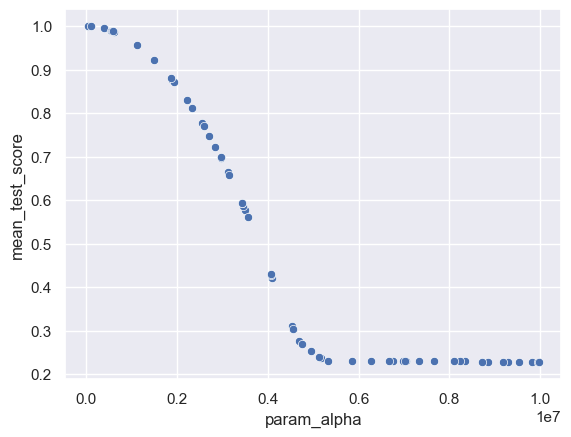

In [47]:
sns.scatterplot(data=rand_lasso_params, x='param_alpha', y='mean_test_score')
plt.show()